**[LSE-01]** モジュールをインポートします。

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**[LSE-02]** Placeholder x を定義します。

In [2]:
x = tf.placeholder(tf.float32, [None, 5])

**[LSE-03]** Variable w を定義します。

In [3]:
w = tf.Variable(tf.zeros([5, 1]))

**[LSE-04]** 計算式 y を定義します。

In [4]:
y = tf.matmul(x, w)

**[LSE-05]** Placeholder t を定義します。

In [5]:
t = tf.placeholder(tf.float32, [None, 1])

**[LSE-06]** 誤差関数 loss を定義します。

In [6]:
loss = tf.reduce_sum(tf.square(y-t))

**[LSE-07]** トレーニングアルゴリズム train_step を定義します。

In [7]:
train_step = tf.train.AdamOptimizer().minimize(loss)

**[LSE-08]** セッションを用意して、Variableを初期化します。

In [8]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

**[LSE-09]** トレーニングセットのデータを用意します。

In [9]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month**n

**[LSE-10]** 勾配降下法によるパラメーターの最適化を100000回繰り返します。

In [10]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.014391
Step: 20000, Loss: 29.295158
Step: 30000, Loss: 28.033054
Step: 40000, Loss: 26.855808
Step: 50000, Loss: 25.771938
Step: 60000, Loss: 26.711918
Step: 70000, Loss: 24.436256
Step: 80000, Loss: 22.975143
Step: 90000, Loss: 22.194229
Step: 100000, Loss: 21.434664


**[LSE-11]** さらに100000回繰り返します。

In [11]:
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 110000, Loss: 20.749628
Step: 120000, Loss: 20.167929
Step: 130000, Loss: 19.527676
Step: 140000, Loss: 18.983555
Step: 150000, Loss: 18.480526
Step: 160000, Loss: 18.012512
Step: 170000, Loss: 17.615368
Step: 180000, Loss: 17.179623
Step: 190000, Loss: 16.879869
Step: 200000, Loss: 20.717033


**[LSE-12]** トレーニング後のパラメーターの値を確認します。

In [12]:
w_val = sess.run(w)
print w_val

[[ 6.10566282]
 [-4.04159737]
 [ 2.51030278]
 [-0.2817387 ]
 [ 0.00828196]]


**[LSE-13]** トレーニング後のパラメーターを用いて、予測気温を計算する関数を定義します。

In [13]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

**[LSE-14]** 予測気温のグラフを描きます。

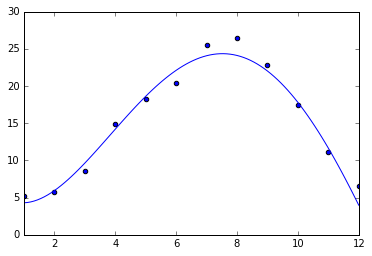

In [14]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)